#    IMPORT DATA

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
excel_file = './Data_Train.xlsx'
data_train = pd.read_excel(excel_file)
data_test=pd.read_excel("./Data_Test.xlsx")

In [2]:
data_test.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2774,2774,2774,2774,2774,2774,2774,2774
unique,2401,35,881,19,9,30,580,392
top,ID_1209,"D-Block, Sector 63, Noida",North Indian,₹200,₹50,-,-,-
freq,8,221,226,820,2556,305,542,593


In [3]:
total_data=pd.concat([data_train,data_test],ignore_index=True,sort=False)
total_data.shape

(13868, 9)

In [4]:
total_data

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",₹150,₹50,3.8,46,18,30 minutes
6,ID_3777,Mumbai Central,"Beverages, Fast Food",₹150,₹50,3.7,108,31,30 minutes
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",₹650,₹50,4.0,1731,1235,45 minutes
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",₹100,₹50,3.9,110,26,30 minutes
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",₹200,₹50,3.9,562,294,65 minutes


## Imputation in the total data

In [5]:
total_data['Average_Cost']=total_data['Average_Cost'].str.replace('₹','')
total_data['Minimum_Order']=total_data['Minimum_Order'].str.replace('₹','')

# Impute Rating, votes and Reviews of the new, opening soon

In [6]:
id_rest=total_data[total_data['Rating'] == '0']['Restaurant'].to_list()

In [7]:
id_rest

[]

In [212]:
total_data['Rating']=total_data['Rating'].replace(['-'], '-1')
total_data['Rating']=total_data['Rating'].replace(['Temporarily Closed'], '-1')
total_data.loc[(total_data.Rating == 'Opening Soon'),'Votes']=0
total_data.loc[(total_data.Rating == 'Opening Soon'),'Reviews']=0
total_data.loc[(total_data.Rating == 'NEW'),'Votes']=0
total_data.loc[(total_data.Rating == 'NEW'),'Reviews']=0
total_data['Rating']=total_data['Rating'].replace(['Opening Soon'], 0)
total_data['Rating']=total_data['Rating'].replace(['NEW'], 0)
total_data['Rating']=total_data['Rating'].replace(['NEW'], 0)
total_data['Votes']=total_data['Votes'].replace(['-'], '-1')
total_data['Reviews']=total_data['Reviews'].replace(['-'], '-1')
total_data['Average_Cost']=total_data['Average_Cost'].replace(['for'], '997')
total_data['Average_Cost']=total_data['Average_Cost'].str.replace(',', '')

In [213]:
total_data['Reviews']=total_data['Reviews'].astype('int64')
total_data['Votes']=total_data['Votes'].astype('int64')
total_data['Rating']=total_data['Rating'].astype('float64')
total_data['Average_Cost']=total_data['Average_Cost'].astype('int64')
total_data['Minimum_Order']=total_data['Minimum_Order'].astype('int64')

In [214]:
id_rest=total_data[total_data['Rating'] == 0]['Restaurant'].to_list()

list_already_exist_id=[]
for i in id_rest:
    id_rest_value=total_data[total_data['Restaurant'] == i]['Restaurant'].to_list()
    if len(id_rest_value) >1:
        list_already_exist_id.append(i)

# for i in list(set(list_already_exist_id)):
# #     print(total_data[total_data['Restaurant'] == i])
#     location=total_data[total_data['Restaurant'] == i]['Location'].to_list()
#     for j in location:
#         print(total_data[((total_data['Restaurant'] == i) & (total_data['Location'] == j) 
#                       &(total_data['Delivery_Time']!=np.nan))])

In [215]:
sub='Fast Food'
avg_list=total_data[(total_data["Cuisines"]=='Fast Food') & (total_data['Minimum_Order']==50) & (total_data['Average_Cost']!=997)]['Average_Cost']
avg_mean=avg_list.mean()
avg_list.unique()
total_data['Average_Cost']=total_data['Average_Cost'].replace(997, 150)

In [216]:
total_data['Reviews']=total_data['Reviews'].replace(-1,int(total_data['Reviews'].mean()))
total_data['Votes']=total_data['Votes'].replace(-1,int(total_data['Votes'].mean()))
total_data['Rating']=total_data['Rating'].replace(-1,round(total_data['Rating'].mean(),1))

In [217]:
total_data

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",150,50,3.8,46,18,30 minutes
6,ID_3777,Mumbai Central,"Beverages, Fast Food",150,50,3.7,108,31,30 minutes
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",650,50,4.0,1731,1235,45 minutes
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",100,50,3.9,110,26,30 minutes
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",200,50,3.9,562,294,65 minutes


# Normalize the Data 

In [218]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
total_data.iloc[:,3:8] = ss.fit_transform(total_data.iloc[:,3:8].values)

In [219]:
total_data

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",-0.009770,-0.179688,0.219056,-0.414340,-0.371259,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",-0.797530,-0.179688,0.219056,-0.416345,-0.371259,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",-0.403650,-0.179688,0.319051,-0.239941,-0.279162,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",0.384110,2.459880,0.419046,-0.085588,-0.048920,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",-0.009770,2.459880,-0.080931,0.605995,0.446987,65 minutes
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",-0.403650,-0.179688,0.519042,-0.346184,-0.321668,30 minutes
6,ID_3777,Mumbai Central,"Beverages, Fast Food",-0.403650,-0.179688,0.419046,-0.221900,-0.275620,30 minutes
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",3.535148,-0.179688,0.719033,3.031547,3.989176,45 minutes
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",-0.797530,-0.179688,0.619037,-0.217891,-0.293331,30 minutes
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",-0.009770,-0.179688,0.619037,0.688183,0.655976,65 minutes


# PAIR PLOT for DF

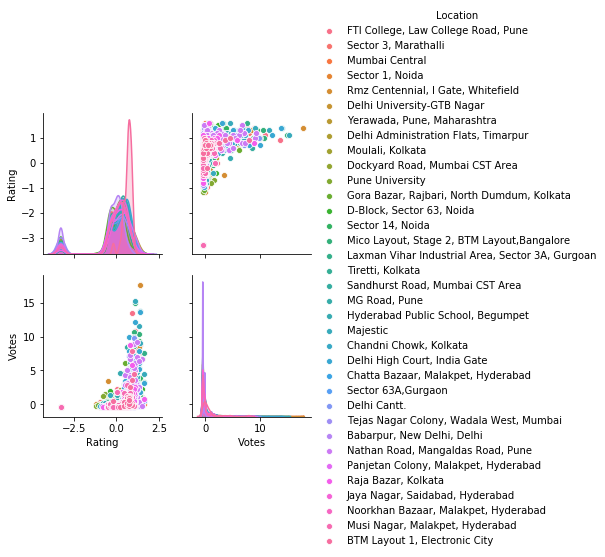

In [221]:
import seaborn as sns
sns.pairplot(total_data.iloc[:,[1,5,6]],hue='Location')

# Applying K-Means Clustering with AVG_COST and Votes

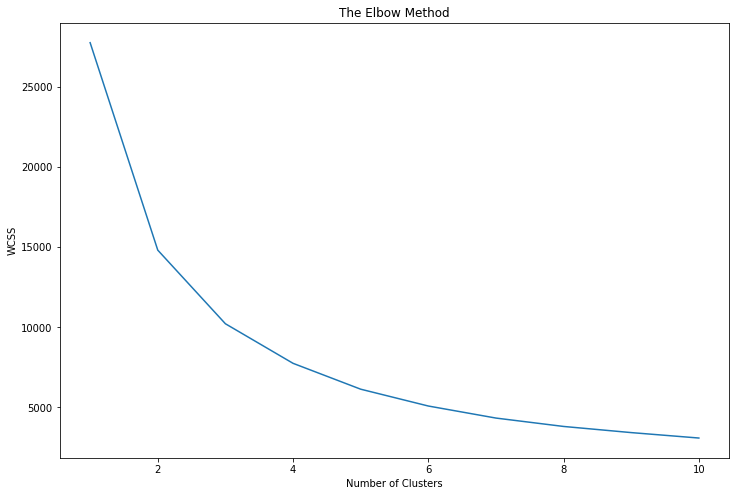

[0 3 3 ... 3 3 3]


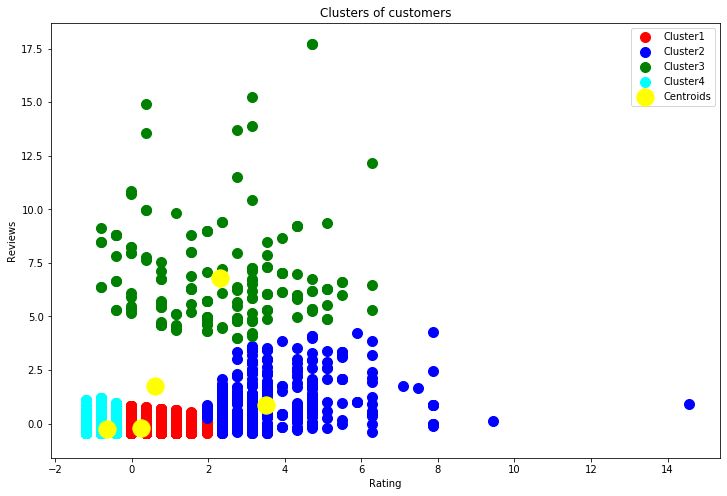

In [117]:
X=total_data.iloc[:,[3,6]].values
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.legend()
plt.show()

total_data['Rating_review_cluster']=y_kmeans

# Applying K-Means Clustering with Rating and Votes

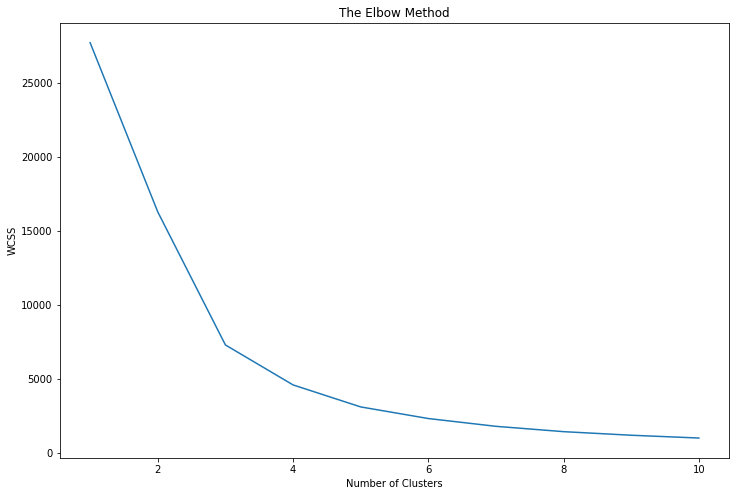

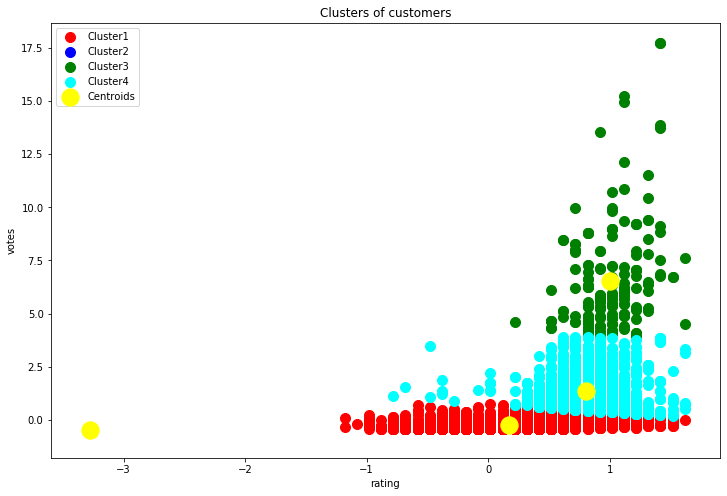

In [223]:
X=total_data.iloc[:,[5,6]].values
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)


plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('rating')
plt.ylabel('votes')
plt.legend()
plt.show()
total_data['AVG_MIN_cost_cluster']=y_kmeans

In [119]:
# total_data.loc[(total_data.Average_Cost<150),'avg_cost_rating']='VERYLOW'
# total_data.loc[((total_data.Average_Cost>=150) & (total_data.Average_Cost<=300)),'avg_cost_rating']='LOW'
# total_data.loc[((total_data.Average_Cost>300) & (total_data.Average_Cost<=650)),'avg_cost_rating']='MED'
# total_data.loc[(total_data.Average_Cost>650),'avg_cost_rating']='HIGH'

In [120]:
cities={'Pune':['FTI College, Law College Road, Pune','Pune University','MG Road, Pune','Nathan Road, Mangaldas Road, Pune']
        ,'Noida':['Sector 1, Noida','D-Block, Sector 63, Noida','Sector 14, Noida']
        ,'Kolkata':['Moulali, Kolkata','Gora Bazar, Rajbari, North Dumdum, Kolkata','Tiretti, Kolkata','Chandni Chowk, Kolkata','Raja Bazar, Kolkata']
        ,'Bangalore':['Sector 3, Marathalli','Rmz Centennial, I Gate, Whitefield','Mico Layout, Stage 2, BTM Layout,Bangalore','Majestic','BTM Layout 1, Electronic City']
        ,'Mumbai':['Mumbai Central','Yerawada, Pune, Maharashtra','Dockyard Road, Mumbai CST Area','Sandhurst Road, Mumbai CST Area','Tejas Nagar Colony, Wadala West, Mumbai']
        ,'Hyderabad':['Hyderabad Public School, Begumpet','Chatta Bazaar, Malakpet, Hyderabad','Panjetan Colony, Malakpet, Hyderabad','Jaya Nagar, Saidabad, Hyderabad','Noorkhan Bazaar, Malakpet, Hyderabad','Musi Nagar, Malakpet, Hyderabad']
        ,'Delhi':['Delhi University-GTB Nagar','Delhi Administration Flats, Timarpur','Delhi High Court, India Gate','Delhi Cantt.','Babarpur, New Delhi, Delhi']
       ,'Gurgoan':['Laxman Vihar Industrial Area, Sector 3A, Gurgoan','Sector 63A,Gurgaon']}
total_data['Cities']=np.nan

In [121]:
total_data.loc[(((total_data.Rating>0) & (total_data.Rating!=-1.0)) & ((total_data.Votes>0) & (total_data.Votes!=-1)) & (total_data.Reviews==-1)),'Reviews']=0

In [122]:
for k, v in cities.items():
    for i in v:
        total_data.loc[(total_data.Location==i),'Cities']=k

In [123]:
total_data[(total_data.Delivery_Time=='120 minutes')]
#            & (total_data.Cities=='Noida')]

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Rating_review_cluster,Cities
424,ID_607,"FTI College, Law College Road, Pune","Bakery, Fast Food",-0.009770,-0.179688,0.419046,-0.235932,-0.229571,120 minutes,0,Pune
596,ID_36,"Sector 63A,Gurgaon","Bakery, Fast Food",0.384110,-0.179688,-0.580908,-0.428372,-0.374801,120 minutes,0,Gurgoan
785,ID_596,"Laxman Vihar Industrial Area, Sector 3A, Gurgoan","Bakery, Desserts, Fast Food",0.384110,2.459880,0.519042,-0.384271,-0.303957,120 minutes,0,Gurgoan
928,ID_4204,"Sector 14, Noida","Bakery, Fast Food, Desserts",-0.009770,-0.179688,0.419046,-0.143721,-0.130390,120 minutes,0,Noida
1210,ID_8357,"Sector 63A,Gurgaon","Bakery, Desserts",-0.009770,2.459880,-0.480913,-0.430377,-0.371259,120 minutes,0,Gurgoan
1947,ID_1342,"Raja Bazar, Kolkata",Bakery,-0.403650,2.459880,-0.480913,-0.083583,-0.098510,120 minutes,3,Kolkata
2156,ID_6823,"Sector 63A,Gurgaon","Bakery, Desserts",-0.009770,-0.179688,0.419046,-0.406322,-0.335837,120 minutes,0,Gurgoan
2176,ID_609,"Laxman Vihar Industrial Area, Sector 3A, Gurgoan","Bakery, Fast Food",-0.009770,2.459880,-0.180926,-0.420354,-0.381885,120 minutes,0,Gurgoan
2634,ID_889,"Sector 14, Noida","Biryani, Mughlai, Hyderabadi, Desserts",0.777989,2.459880,0.919024,2.221694,1.481306,120 minutes,4,Noida
2698,ID_4243,"Gora Bazar, Rajbari, North Dumdum, Kolkata","Bakery, Desserts",-0.009770,2.459880,1.319006,0.070770,0.223829,120 minutes,0,Kolkata


# Target encoding Technique

In [124]:
df_final_bef_split_target=total_data.iloc[0:11094]

In [125]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df_final_bef_split_target['Delivery_Time_encoded']= label_encoder.fit_transform(df_final_bef_split_target['Delivery_Time'])

/home/grahul@idexcel.internal/anaconda3/envs/myvirenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Group By Location

In [126]:
gk = df_final_bef_split_target.groupby('Location')
agg_df=gk['Delivery_Time_encoded'].agg([np.mean,'min', 'max',np.sum,np.std])
# print(agg_df)
for i,v in agg_df.iterrows():
#     print(i[0],v['mean'])
#     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'avg_mean']=v['mean']
#     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'avg_min']=v['min']
#     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'avg_max']=v['max']
#     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'avg_sum']=v['sum']
#     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'avg_std']=v['std']
    total_data.loc[((total_data.Location==i)),'avg_mean']=v['mean']
    total_data.loc[((total_data.Location==i)),'avg_min']=v['min']
    total_data.loc[((total_data.Location==i)),'avg_max']=v['max']
    total_data.loc[((total_data.Location==i)),'avg_sum']=v['sum']
    total_data.loc[((total_data.Location==i)),'avg_std']=v['std']

# agg2_df=gk['Reviews'].agg([np.mean,'min', 'max',np.sum,np.std])
# for i,v in agg2_df.iterrows():
# #     print(i,v['mean'])
# #     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'rev_mean']=round(v['mean'],1)
# #     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'rev_min']=round(v['min'],1)
# #     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'rev_max']=round(v['max'],1)
# #     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'rev_std']=round(v['std'],1)
#     total_data.loc[((total_data.Location==i)),'rev_mean']=round(v['mean'],1)
#     total_data.loc[((total_data.Location==i)),'rev_min']=round(v['min'],1)
#     total_data.loc[((total_data.Location==i)),'rev_max']=round(v['max'],1)
#     total_data.loc[((total_data.Location==i)),'rev_std']=round(v['std'],1)

# agg3_df=gk['Votes'].agg([np.mean,'min', 'max',np.sum,np.std])
# # agg_df
# for i,v in agg3_df.iterrows():
# #     print(i,v['mean'])
# #     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'vot_mean']=round(v['mean'],1)
# #     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'vot_min']=round(v['min'],1)
#     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'vot_max']=round(v['max'],1)
#     total_data.loc[((total_data.Location==i[1]) & (total_data.Cities==i[0])),'vot_std']=round(v['std'],1)

In [127]:
total_data.tail(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Rating_review_cluster,Cities,avg_mean,avg_min,avg_max,avg_sum,avg_std
13858,ID_1046,"Rmz Centennial, I Gate, Whitefield",South Indian,-0.797530,-0.179688,0.619037,-0.406322,-0.357090,NaN,3,Bangalore,3.431072,1.0,5.0,1568.0,0.722567
13859,ID_5635,"D-Block, Sector 63, Noida","North Indian, Rolls, Chinese, Continental, Fas...",-0.403650,-0.179688,0.719033,0.189041,0.294673,NaN,3,Noida,3.418114,0.0,6.0,2755.0,0.717220
13860,ID_4371,"Dockyard Road, Mumbai CST Area","Desserts, Beverages",-0.403650,-0.179688,0.019065,-0.424363,-0.367717,NaN,3,Mumbai,3.432990,1.0,6.0,999.0,0.647124
13861,ID_908,"Sector 1, Noida",Biryani,-0.009770,-0.179688,0.019065,-0.396299,-0.371259,NaN,0,Noida,3.408344,0.0,6.0,2696.0,0.767294
13862,ID_3418,"Musi Nagar, Malakpet, Hyderabad","North Indian, Chinese, South Indian, Desserts",0.777989,-0.179688,0.119060,-0.376253,-0.342921,NaN,0,Hyderabad,3.323529,3.0,5.0,226.0,0.584404
13863,ID_6342,Delhi University-GTB Nagar,"Fast Food, Chinese",-0.797530,-0.179688,-3.280786,-0.438395,-0.385428,NaN,3,Delhi,3.372477,1.0,5.0,1838.0,0.649359
13864,ID_8495,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, North Indian, Desserts, Beverages",0.384110,-0.179688,-0.180926,-0.428372,-0.381885,NaN,0,Bangalore,3.381204,1.0,5.0,3202.0,0.612921
13865,ID_7122,"Noorkhan Bazaar, Malakpet, Hyderabad","Andhra, South Indian",-0.403650,-0.179688,-0.280922,-0.406322,-0.381885,NaN,3,Hyderabad,3.323529,3.0,5.0,226.0,0.558280
13866,ID_2475,"D-Block, Sector 63, Noida",Bakery,-0.797530,2.459880,-0.280922,-0.424363,-0.378343,NaN,3,Noida,3.418114,0.0,6.0,2755.0,0.717220
13867,ID_1595,"Dockyard Road, Mumbai CST Area","Italian, Street Food, Fast Food",-0.403650,-0.179688,0.319051,-0.239941,-0.279162,NaN,3,Mumbai,3.432990,1.0,6.0,999.0,0.647124


In [128]:
# print("\nSplitting 'Name' column into two different columns :\n", total_data.Location.str.split(',',expand=True))
# total_data[['address1','address2','address3','address4']] = total_data.Location.str.split(',',expand=True)

## Code to get uniques in cusinie with their count

In [129]:
# cuisines_df = pd.DataFrame(columns = ['Cuisines'],index=(range(50000)))
# j=0
# for key,value in total_data.iterrows():
#     cuisines=value['Cuisines'].split(',')
#     for i in cuisines:
#         cuisines_df['Cuisines'].iloc[j]=i.strip()
#         j=j+1
k=0
cuisines_dt={}
cusines_all=total_data['Cuisines'].to_list()
# print(cusines_all,len(cusines_all))
for i in cusines_all:
    for j in i.split(','):
        val=j.strip()
        if val not in cuisines_dt.keys():
            cuisines_dt[val]=1
        else:
            k=cuisines_dt[val]
            cuisines_dt[val]=k+1

In [130]:
cuisines_dt

{'Fast Food': 3862,
 'Rolls': 620,
 'Burger': 414,
 'Salad': 284,
 'Wraps': 97,
 'Ice Cream': 480,
 'Desserts': 1548,
 'Italian': 751,
 'Street Food': 935,
 'Mughlai': 1098,
 'North Indian': 5999,
 'Chinese': 4339,
 'Cafe': 592,
 'Beverages': 1789,
 'South Indian': 1507,
 'Thai': 205,
 'Asian': 259,
 'Mithai': 386,
 'Momos': 397,
 'Indonesian': 3,
 'Biryani': 1161,
 'Kerala': 73,
 'Bihari': 14,
 'Mexican': 143,
 'Japanese': 72,
 'Bakery': 864,
 'Burmese': 13,
 'Bubble Tea': 6,
 'Tea': 87,
 'Pizza': 611,
 'Lucknowi': 15,
 'Mangalorean': 27,
 'European': 89,
 'Continental': 694,
 'Sandwich': 339,
 'Healthy Food': 352,
 'Bengali': 132,
 'American': 163,
 'Mishti': 82,
 'Hyderabadi': 85,
 'Andhra': 111,
 'Assamese': 4,
 'Maharashtrian': 135,
 'German': 9,
 'Arabian': 82,
 'Finger Food': 67,
 'Kebab': 214,
 'Chettinad': 14,
 'Seafood': 246,
 'Juices': 198,
 'Parsi': 15,
 'Sushi': 50,
 'Odia': 21,
 'Tamil': 3,
 'Cantonese': 2,
 'North Eastern': 29,
 'Tibetan': 47,
 'Lebanese': 120,
 'Spanish

# Encoding Cusines to have 1 where present, else 0

In [131]:
# import re
# df=pd.DataFrame
# cuisines_df=cuisines_df.dropna()
# cusinie_unique=cuisines_df['Cuisines'].unique()
# cusinie_unique = [re.sub(r'(?<! ) (?! )', '_', cusinie_unique[l]) for l in range(len(cusinie_unique))]
# total_data[cusinie_unique] = pd.DataFrame(columns = cusinie_unique)
# # total_data[['Cuisine1','Cuisine2','Cuisine3','Cuisine4','Cuisine5','Cuisine6','Cuisine7','Cuisine8']] = total_data.Cuisines.str.split(',',expand=True)
# find_str=''
# for i in cusinie_unique:
# #     print(i)
#     find_str=i.replace('_',' ')
#     print(find_str)
#     total_data.loc[(total_data.Cuisines.str.find(find_str)!=-1),i]=1
    
# for i,value in total_data.iterrows():
#     cuisines=value['Cuisines'].split(',')
#     for j in cuisines:
# #         print(j,i)
#         total_data[j.strip()].iloc[i]=1

In [132]:
total_data

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Rating_review_cluster,Cities,avg_mean,avg_min,avg_max,avg_sum,avg_std
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",-0.009770,-0.179688,0.219056,-0.414340,-0.371259,30 minutes,0,Pune,3.238014,1.0,6.0,1891.0,0.520450
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",-0.797530,-0.179688,0.219056,-0.416345,-0.371259,30 minutes,3,Bangalore,3.390710,1.0,5.0,1241.0,0.676673
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",-0.403650,-0.179688,0.319051,-0.239941,-0.279162,65 minutes,3,Mumbai,3.505447,1.0,6.0,1609.0,0.694231
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",0.384110,2.459880,0.419046,-0.085588,-0.048920,30 minutes,0,Noida,3.408344,0.0,6.0,2696.0,0.767294
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",-0.009770,2.459880,-0.080931,0.605995,0.446987,65 minutes,0,Bangalore,3.431072,1.0,5.0,1568.0,0.722567
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",-0.403650,-0.179688,0.519042,-0.346184,-0.321668,30 minutes,3,Bangalore,3.431072,1.0,5.0,1568.0,0.722567
6,ID_3777,Mumbai Central,"Beverages, Fast Food",-0.403650,-0.179688,0.419046,-0.221900,-0.275620,30 minutes,3,Mumbai,3.505447,1.0,6.0,1609.0,0.694231
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",3.535148,-0.179688,0.719033,3.031547,3.989176,45 minutes,1,Delhi,3.372477,1.0,5.0,1838.0,0.649359
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",-0.797530,-0.179688,0.619037,-0.217891,-0.293331,30 minutes,3,Delhi,3.372477,1.0,5.0,1838.0,0.649359
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",-0.009770,-0.179688,0.619037,0.688183,0.655976,65 minutes,0,Noida,3.408344,0.0,6.0,2696.0,0.767294


In [133]:
# corelation_coef=np.corrcoef(data['Reviews'].to_list(), data['Votes'].to_list())

# corelation_coef
# data=data.drop('Reviews',axis=1)

# cuisines_df = pd.DataFrame(columns = ['Restaurant', 'Cuisines','Rating','Votes','Reviews'],index=(range(30000)))
# j=0
# for key,value in data.iterrows():
#     cuisines=value['Cuisines'].split(',')
#     for i in cuisines:
#         cuisines_df['Restaurant'].iloc[j]=value['Restaurant']
#         cuisines_df['Cuisines'].iloc[j]=i.strip()
#         cuisines_df['Rating'].iloc[j]=value['Rating']
#         cuisines_df['Votes'].iloc[j]=value['Votes']
#         cuisines_df['Reviews'].iloc[j]=value['Reviews']
#         j=j+1
# cuisines_df=cuisines_df.dropna()
# data=data.drop('Cuisines',axis=1)
# data=data.drop('Rating',axis=1)
# data=data.drop('Votes',axis=1)
# data=data.drop('Reviews',axis=1)

# cuisines_df

# cuisines_df.iloc[:,2:].describe()

In [134]:
# for i in cusinie_unique:
# #     print(i)
#     gb_data=gk.get_group(i)
#     Reviews_mean=gb_data['Reviews'].mean()
# #     print(Reviews_mean)
#     Votes_mean=gb_data['Votes'].mean()
# #     print(Votes_mean)
#     Rating_mean=gb_data['Rating'].mean()
# #     print(Rating_mean)
#     cuisines_df.loc[((cuisines_df.Rating == -1) & (cuisines_df.Cuisines == i)),'Rating']=round(Rating_mean, 1)
#     cuisines_df.loc[((cuisines_df.Votes == -1) & (cuisines_df.Cuisines == i)),'Votes']=int(Votes_mean)
#     cuisines_df.loc[((cuisines_df.Reviews == -1) & (cuisines_df.Cuisines == i)),'Reviews']=int(Reviews_mean)

In [135]:
from sklearn import preprocessing
# # from sklearn.preprocessing import OneHotEncoder
# # label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
total_data['Restaurant']= label_encoder.fit_transform(total_data['Restaurant'])
total_data['Location']= label_encoder.fit_transform(total_data['Location'])
total_data['Cuisines']= label_encoder.fit_transform(total_data['Cuisines'])
total_data['Cities']= label_encoder.fit_transform(total_data['Cities'])

In [136]:
total_data[['Cities1','Cities2','Cities3','Cities4','Cities5','Cities6','Cities7','Cities8']]=pd.get_dummies(total_data['Cities'])
total_data=total_data.drop('Cities',axis=1)

In [137]:
total_data=total_data.replace(np.nan,0)

In [138]:
total_data

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Rating_review_cluster,...,avg_sum,avg_std,Cities1,Cities2,Cities3,Cities4,Cities5,Cities6,Cities7,Cities8
0,5915,10,1085,-0.009770,-0.179688,0.219056,-0.414340,-0.371259,30 minutes,0,...,1891.0,0.520450,0,0,0,0,0,0,0,1
1,2093,30,1215,-0.797530,-0.179688,0.219056,-0.416345,-0.371259,30 minutes,3,...,1241.0,0.676673,1,0,0,0,0,0,0,0
2,663,19,1287,-0.403650,-0.179688,0.319051,-0.239941,-0.279162,65 minutes,3,...,1609.0,0.694231,0,0,0,0,0,1,0,0
3,5478,28,1525,0.384110,2.459880,0.419046,-0.085588,-0.048920,30 minutes,0,...,2696.0,0.767294,0,0,0,0,0,0,1,0
4,5695,26,423,-0.009770,2.459880,-0.080931,0.605995,0.446987,65 minutes,0,...,1568.0,0.722567,1,0,0,0,0,0,0,0
5,4693,26,2267,-0.403650,-0.179688,0.519042,-0.346184,-0.321668,30 minutes,3,...,1568.0,0.722567,1,0,0,0,0,0,0,0
6,3087,19,228,-0.403650,-0.179688,0.419046,-0.221900,-0.275620,30 minutes,3,...,1609.0,0.694231,0,0,0,0,0,1,0,0
7,7168,8,756,3.535148,-0.179688,0.719033,3.031547,3.989176,45 minutes,1,...,1838.0,0.649359,0,1,0,0,0,0,0,0
8,2191,8,1462,-0.797530,-0.179688,0.619037,-0.217891,-0.293331,30 minutes,3,...,1838.0,0.649359,0,1,0,0,0,0,0,0
9,2751,28,1065,-0.009770,-0.179688,0.619037,0.688183,0.655976,65 minutes,0,...,2696.0,0.767294,0,0,0,0,0,0,1,0


In [38]:
df_final_bef_split=total_data.iloc[0:11094]
test_data=total_data.iloc[11094:]

In [39]:
test_data=test_data.drop('Restaurant',axis=1)
df_final_bef_split=df_final_bef_split.drop('Restaurant',axis=1)
test_data=test_data.drop('Cuisines',axis=1)
df_final_bef_split=df_final_bef_split.drop('Cuisines',axis=1)
test_data=test_data.drop('Location',axis=1)
df_final_bef_split=df_final_bef_split.drop('Location',axis=1)

In [40]:
y=df_final_bef_split.pop('Delivery_Time')
X=df_final_bef_split

In [41]:
test_data=test_data.drop('Delivery_Time',axis=1)

In [52]:
X

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Rating_review_cluster,avg_mean,avg_min,avg_max,avg_sum,avg_std,Cities1,Cities2,Cities3,Cities4,Cities5,Cities6,Cities7,Cities8
0,-0.009770,-0.179688,0.219056,-0.414340,-0.371259,0,3.238014,1.0,6.0,1891.0,0.520450,0,0,0,0,0,0,0,1
1,-0.797530,-0.179688,0.219056,-0.416345,-0.371259,3,3.390710,1.0,5.0,1241.0,0.676673,1,0,0,0,0,0,0,0
2,-0.403650,-0.179688,0.319051,-0.239941,-0.279162,3,3.505447,1.0,6.0,1609.0,0.694231,0,0,0,0,0,1,0,0
3,0.384110,2.459880,0.419046,-0.085588,-0.048920,0,3.408344,0.0,6.0,2696.0,0.767294,0,0,0,0,0,0,1,0
4,-0.009770,2.459880,-0.080931,0.605995,0.446987,0,3.431072,1.0,5.0,1568.0,0.722567,1,0,0,0,0,0,0,0
5,-0.403650,-0.179688,0.519042,-0.346184,-0.321668,3,3.431072,1.0,5.0,1568.0,0.722567,1,0,0,0,0,0,0,0
6,-0.403650,-0.179688,0.419046,-0.221900,-0.275620,3,3.505447,1.0,6.0,1609.0,0.694231,0,0,0,0,0,1,0,0
7,3.535148,-0.179688,0.719033,3.031547,3.989176,1,3.372477,1.0,5.0,1838.0,0.649359,0,1,0,0,0,0,0,0
8,-0.797530,-0.179688,0.619037,-0.217891,-0.293331,3,3.372477,1.0,5.0,1838.0,0.649359,0,1,0,0,0,0,0,0
9,-0.009770,-0.179688,0.619037,0.688183,0.655976,0,3.408344,0.0,6.0,2696.0,0.767294,0,0,0,0,0,0,1,0


In [43]:
X.shape,test_data.shape

((11094, 19), (2774, 19))

In [51]:
X

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Rating_review_cluster,avg_mean,avg_min,avg_max,avg_sum,avg_std,Cities1,Cities2,Cities3,Cities4,Cities5,Cities6,Cities7,Cities8
0,-0.009770,-0.179688,0.219056,-0.414340,-0.371259,0,3.238014,1.0,6.0,1891.0,0.520450,0,0,0,0,0,0,0,1
1,-0.797530,-0.179688,0.219056,-0.416345,-0.371259,3,3.390710,1.0,5.0,1241.0,0.676673,1,0,0,0,0,0,0,0
2,-0.403650,-0.179688,0.319051,-0.239941,-0.279162,3,3.505447,1.0,6.0,1609.0,0.694231,0,0,0,0,0,1,0,0
3,0.384110,2.459880,0.419046,-0.085588,-0.048920,0,3.408344,0.0,6.0,2696.0,0.767294,0,0,0,0,0,0,1,0
4,-0.009770,2.459880,-0.080931,0.605995,0.446987,0,3.431072,1.0,5.0,1568.0,0.722567,1,0,0,0,0,0,0,0
5,-0.403650,-0.179688,0.519042,-0.346184,-0.321668,3,3.431072,1.0,5.0,1568.0,0.722567,1,0,0,0,0,0,0,0
6,-0.403650,-0.179688,0.419046,-0.221900,-0.275620,3,3.505447,1.0,6.0,1609.0,0.694231,0,0,0,0,0,1,0,0
7,3.535148,-0.179688,0.719033,3.031547,3.989176,1,3.372477,1.0,5.0,1838.0,0.649359,0,1,0,0,0,0,0,0
8,-0.797530,-0.179688,0.619037,-0.217891,-0.293331,3,3.372477,1.0,5.0,1838.0,0.649359,0,1,0,0,0,0,0,0
9,-0.009770,-0.179688,0.619037,0.688183,0.655976,0,3.408344,0.0,6.0,2696.0,0.767294,0,0,0,0,0,0,1,0


In [45]:
X.columns

Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews',
       'Rating_review_cluster', 'avg_mean', 'avg_min', 'avg_max', 'avg_sum',
       'avg_std', 'Cities1', 'Cities2', 'Cities3', 'Cities4', 'Cities5',
       'Cities6', 'Cities7', 'Cities8'],
      dtype='object')

# FIT Model For Personal Predicton

In [46]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
clf = RandomForestClassifier(n_estimators=1000, max_depth=6,random_state=42)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

[0.04581317 0.12280385 0.12592034 0.34283356 0.23391291 0.03468073
 0.02408177 0.00615582 0.00222798 0.01289256 0.02729462 0.00251098
 0.00200779 0.0018158  0.00091042 0.00189023 0.00607091 0.00353029
 0.00264628]


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

0.7034700315457413

# FIT Model for Submission

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=2,random_state=42)
clf.fit(X, y)
print(clf.feature_importances_)
y_test = pd.DataFrame(clf.predict(test_data))

[7.46804542e-02 1.17959171e-01 1.52670787e-01 2.99962422e-01
 2.39455930e-01 6.42920685e-02 2.29826562e-02 3.46935920e-03
 3.17073280e-04 1.59622822e-03 1.65254646e-02 1.59048661e-04
 3.46589084e-04 2.16519261e-04 8.94668581e-05 8.11587296e-05
 2.87896063e-03 9.16406858e-04 1.40023583e-03]


# SAVE EXCEL

In [49]:
y_test.to_excel('submission281.xlsx')

In [179]:
y_test[0].unique(),len(y_test[0])

(array(['30 minutes', '45 minutes'], dtype=object), 2774)